# Metode dan formula yang digunakan
# 1. Vandermonde Matrix : 
$$ \vec{\beta} = (X^TX)^{-1}X^T\vec{y}$$
# 2. R-Squared Formula : 
$$R^2 = 1 - \frac{(\sum{y_i - \hat{y_i})^2}}{\sum{(y_i-\bar{y})^2}}$$
# 3. LU-Decomposition

Menentukan Persaaman Regresi Menggunakan Metode LSR Derajat 2, LU-Decomposition dan Matriks Vandermonde Berdasarkan Data x,y
Matriks X (Vandermonde): 
[[1.0, 1.0, 1.0], [1.0, 2.0, 4.0], [1.0, 3.0, 9.0], [1.0, 4.0, 16.0], [1.0, 5.0, 25.0], [1.0, 6.0, 36.0], [1.0, 7.0, 49.0], [1.0, 8.0, 64.0], [1.0, 9.0, 81.0], [1.0, 10.0, 100.0]]
Matriks Transpose dari X : 
[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0], [1.0, 4.0, 9.0, 16.0, 25.0, 36.0, 49.0, 64.0, 81.0, 100.0]]
Matriks M : 
[[10.0, 55.0, 385.0], [55.0, 385.0, 3025.0], [385.0, 3025.0, 25333.0]]
Matriks Lower = 
[[ 10.    0.    0. ]
 [ 55.   82.5   0. ]
 [385.  907.5 528. ]]
Matriks Upper = 
[[ 1.   5.5 38.5]
 [ 0.   1.  11. ]
 [ 0.   0.   1. ]]
Matriks D = 
[[ 0.1         0.          0.        ]
 [-0.06666667  0.01212121  0.        ]
 [ 0.04166667 -0.02083333  0.00189394]]
Matriks Invers M : 
[[ 1.38333333 -0.525       0.04166667]
 [-0.525       0.24128788 -0.02083333]
 [ 0.0416

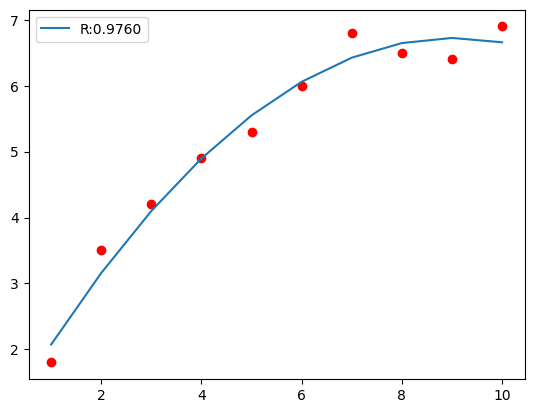

In [6]:
import numpy as np
import matplotlib.pyplot as plt
dataX = np.array([1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0])
dataY = np.array([1.8,3.5,4.2,4.9,5.3,6,6.8,6.5,6.4,6.9])

x = []
n = int(input("Masukkan jumlah orde: "))
xSeparation = []
print(f"Menentukan Persaaman Regresi Menggunakan Metode LSR Derajat {n}, LU-Decomposition dan Matriks Vandermonde Berdasarkan Data x,y")
for i in range(len(dataX)):
    pangkat = 0 
    for j in range(n+1):
        elementX = dataX[i]**pangkat
        pangkat += 1 
        xSeparation.append(elementX)
    x.append(xSeparation)
    xSeparation = [] # memisahkan setiap baris
print(f"Matriks X (Vandermonde): \n{x}")

def transposeMatrix(x):
    xT = []
    for j in range(len(x[0])):
        cols = []
        for i in range(len(x)):
            cols.append(x[i][j])
        xT.append(cols)
    return xT

xTranspose = transposeMatrix(x)
print(f"Matriks Transpose dari X : \n{xTranspose}")

m = []
def multiplyMatrixs(x1,x2):
    for i in range(len(x1)):
        row = []
        for j in range(len(x2[0])):
            sum = 0 
            for k in range(len(x1[0])):
                sum += x1[i][k] * x2[k][j]
            row.append(sum)
        m.append(row)    
    return m
multiplyM = multiplyMatrixs(xTranspose,x)
print(f"Matriks M : \n{multiplyM}")

#m = np.array([[10, 55, 385], [55, 385, 3025], [385, 3025, 25333]],float)
y = np.array([
    [1,0,0],
            [0,1,0],
            [0,0,1]],float)
y1 = np.array([
    [1,0,],
    [0,1,]],float)
beta = np.zeros_like(m)
U = np.zeros_like(m)
L = np.zeros_like(m)
def LUCrout():
    # Start
    for i in range(len(L)):
        L[i][0]= m[i][0] #2
        for j in range(0,len(m)):
            if i==j: #3
                U[i][j] = 1.0
            else:
                U[0][j] = m[0][j]/L[0][0] #4
    
    for j in range(1,len(L)): #5
        for i in range(j,len(m)):
            LUforLower = 0.0
            for k in range(0,j):
                LUforLower += L[i][k]*U[k][j]
            L[i][j] = m[i][j] - LUforLower
            
        for k in range(j,len(m)):
            LUforUpper = 0.0
            for i in range(0,j):
                LUforUpper += L[j][i]*U[i][k]
            U[j][k] = (m[j][k] - LUforUpper)/L[j][j]
    for q in range(len(m)):
        sumofLU = 0.0
        for k in range(0,q): # batas n-1 awalnya kemudian upper tidak sempurna perhitungannya
            sumofLU += L[q][k]*U[k][q]
        L[q][q] = m[q][q] - sumofLU
        
    for i in range(0,len(beta)):
        sumOFLD = 0.0
        for j in range(0,i):
            sumOFLD += L[i][j]*beta[j]
        if n == 2:
            beta[i] = (y[i] - sumOFLD)/L[i][i]
        elif n == 1:
            beta[i] = (y1[i] - sumOFLD)/L[i][i]
    print(f"Matriks Lower = \n{L}")
    print(f"Matriks Upper = \n{U}")
    print(f"Matriks D = \n{beta}")
LUCrout()

b = U
a = beta
inversM = np.array([[0,0,0],
                    [0,0,0],
                    [0,0,0]],float)

inversM1 = np.array([[0,0],
                    [0,0]],float)
if n == 1:
    panjangM = len(inversM1)
elif n == 2:
    panjangM = len(inversM)
def backwardSubs(u,d):
    for i in range(panjangM-1,-1,-1):
        sumUpper = 0.0
        for j in range(i+1,panjangM):
            if n == 2:
                sumUpper += u[i][j]*inversM[j]
            elif n == 1:
                sumUpper += u[i][j]*inversM1[j]
        if n == 2:
            inversM[i] = (d[i] - sumUpper)/u[i][i]
        elif n == 1:
            inversM1[i] = (d[i] - sumUpper)/u[i][i]
    if n == 2:
        print(f"Matriks Invers M : \n{inversM}")
    elif n == 1:
        print(f"Matriks Invers M : \n{inversM1}")
backwardSubs(b,a)

if n == 1:
    beta = inversM1@xTranspose@dataY
    print(f"Nilai koefisien beta= \n{beta}")
    print(f"Persamaan Regresi= \n {beta[0]} + {beta[1]}x")
elif n == 2:
    beta = inversM@xTranspose@dataY
    print(f"Nilai koefisien beta= \n{beta}")
    print(f"Persamaan Regresi= \n {beta[0]} + {beta[1]}x + ({beta[2]}x^2) ")

yBar = 5.23
yHat = []
rValue = 0.0
def rSquared(dataY,yBar,yHat):
    if n == 2:
        yHat = [beta[0]+beta[1]*x+beta[2]*x**2 for x in dataX]
    elif n==1:
        yHat = [beta[0]+beta[1]*x for x in dataX]
    SSR = 0
    SST = 0
    for i in range(len(dataY)):
        SSR += (dataY[i] - yHat[i])**2
        SST += (dataY[i]-yBar)**2
    rValue = 1 - (SSR/SST)
    print(f"Nilai Koefisien Relasi {rValue}")
    return rValue
rSquared(dataY,yBar,yHat)

if n == 1:
    dataYapprox = [beta[0]+beta[1]*x for x in dataX]
elif n == 2:
    dataYapprox = [beta[0]+beta[1]*x+beta[2]*x**2 for x in dataX]
    
plt.plot(dataX,dataYapprox,label="R:%.4f" %rSquared(dataY,yBar,yHat))
plt.scatter(dataX,dataY,color="red")
plt.legend()
plt.show()

# Percobaan 4

Derajat 1

Menentukan Persaaman Regresi Menggunakan Metode LSR Derajat 1, LU-Decomposition dan Matriks Vandermonde Berdasarkan Data x,y
Matriks X (Vandermonde): 
[[1.0, 1.3], [1.0, 1.5], [1.0, 1.9], [1.0, 2.1]]
Matriks Transpose dari X : 
[[1.0, 1.0, 1.0, 1.0], [1.3, 1.5, 1.9, 2.1]]
Matriks M : 
[[4.0, 6.799999999999999], [6.799999999999999, 11.96]]
Matriks Lower = 
[[4.  0. ]
 [6.8 0.4]]
Matriks Upper = 
[[1.  1.7]
 [0.  1. ]]
Matriks D = 
[[ 0.25  0.  ]
 [-4.25  2.5 ]]
Matriks Invers M : 
[[ 7.475 -4.25 ]
 [-4.25   2.5  ]]
Nilai koefisien beta= 
[2.306 0.045]
Persamaan Regresi= 
 2.3059999999999876 + 0.04500000000000215x


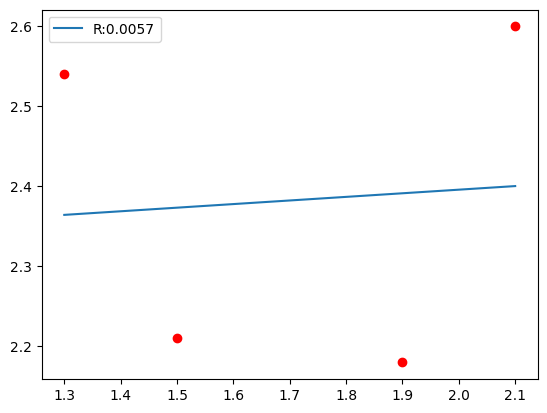

In [81]:
import numpy as np
import matplotlib.pyplot as plt
dataX = np.array([1.3,1.5,1.9,2.1])
dataY = np.array([2.54,2.21,2.18,2.6])

x = []
n = int(input("Masukkan jumlah orde: "))
xSeparation = []
print(f"Menentukan Persaaman Regresi Menggunakan Metode LSR Derajat {n}, LU-Decomposition dan Matriks Vandermonde Berdasarkan Data x,y")
for i in range(len(dataX)):
    pangkat = 0 
    for j in range(n+1):
        elementX = dataX[i]**pangkat
        pangkat += 1 
        xSeparation.append(elementX)
    x.append(xSeparation)
    xSeparation = [] # memisahkan setiap baris
print(f"Matriks X (Vandermonde): \n{x}")

def transposeMatrix(x):
    xT = []
    for j in range(len(x[0])):
        cols = []
        for i in range(len(x)):
            cols.append(x[i][j])
        xT.append(cols)
    return xT

xTranspose = transposeMatrix(x)
print(f"Matriks Transpose dari X : \n{xTranspose}")

m = []
def multiplyMatrixs(x1,x2):
    for i in range(len(x1)):
        row = []
        for j in range(len(x2[0])):
            sum = 0 
            for k in range(len(x1[0])):
                sum += x1[i][k] * x2[k][j]
            row.append(sum)
        m.append(row)    
    return m
multiplyM = multiplyMatrixs(xTranspose,x)
print(f"Matriks M : \n{multiplyM}")

#m = np.array([[10, 55, 385], [55, 385, 3025], [385, 3025, 25333]],float)
y = np.array([
    [1,0,0],
            [0,1,0],
            [0,0,1]],float)
y1 = np.array([
    [1,0,],
    [0,1,]],float)
beta = np.zeros_like(m)
U = np.zeros_like(m)
L = np.zeros_like(m)
def LUCrout():
    # Start
    for i in range(len(L)):
        L[i][0]= m[i][0] #2
        for j in range(0,len(m)):
            if i==j: #3
                U[i][j] = 1.0
            else:
                U[0][j] = m[0][j]/L[0][0] #4
    
    for j in range(1,len(L)): #5
        for i in range(j,len(m)):
            LUforLower = 0.0
            for k in range(0,j):
                LUforLower += L[i][k]*U[k][j]
            L[i][j] = m[i][j] - LUforLower
            
        for k in range(j,len(m)):
            LUforUpper = 0.0
            for i in range(0,j):
                LUforUpper += L[j][i]*U[i][k]
            U[j][k] = (m[j][k] - LUforUpper)/L[j][j]
    for q in range(len(m)):
        sumofLU = 0.0
        for k in range(0,q): # batas n-1 awalnya kemudian upper tidak sempurna perhitungannya
            sumofLU += L[q][k]*U[k][q]
        L[q][q] = m[q][q] - sumofLU
        
    for i in range(0,len(beta)):
        sumOFLD = 0.0
        for j in range(0,i):
            sumOFLD += L[i][j]*beta[j]
        if n == 2:
            beta[i] = (y[i] - sumOFLD)/L[i][i]
        elif n == 1:
            beta[i] = (y1[i] - sumOFLD)/L[i][i]
    print(f"Matriks Lower = \n{L}")
    print(f"Matriks Upper = \n{U}")
    print(f"Matriks D = \n{beta}")
LUCrout()

b = U
a = beta

inversM = np.array([[0,0,0],
                    [0,0,0],
                    [0,0,0]],float)

inversM1 = np.array([[0,0],
                    [0,0]],float)
if n == 1:
    panjangM = len(inversM1)
elif n == 2:
    panjangM = len(inversM)
def backwardSubs(u,d):
    for i in range(panjangM-1,-1,-1):
        sumUpper = 0.0
        for j in range(i+1,panjangM):
            if n == 2:
                sumUpper += u[i][j]*inversM[j]
            elif n == 1:
                sumUpper += u[i][j]*inversM1[j]
        if n == 2:
            inversM[i] = (d[i] - sumUpper)/u[i][i]
        elif n == 1:
            inversM1[i] = (d[i] - sumUpper)/u[i][i]
    if n == 2:
        print(f"Matriks Invers M : \n{inversM}")
    elif n == 1:
        print(f"Matriks Invers M : \n{inversM1}")
backwardSubs(b,a)

if n == 1:
    beta = inversM1@xTranspose@dataY
    print(f"Nilai koefisien beta= \n{beta}")
    print(f"Persamaan Regresi= \n {beta[0]} + {beta[1]}x")
elif n == 2:
    beta = inversM@xTranspose@dataY
    print(f"Nilai koefisien beta= \n{beta}")
    print(f"Persamaan Regresi= \n {beta[0]} + {beta[1]}x + ({beta[2]}x^2) ")

yBar = 2.3825
yHat = []
rValue = 0.0
def rSquared(dataY,yBar,yHat):
    if n == 2:
        yHat = [beta[0]+beta[1]*x+beta[2]*x**2 for x in dataX]
    elif n==1:
        yHat = [beta[0]+beta[1]*x for x in dataX]
    SSR = 0
    SST = 0
    for i in range(len(dataY)):
        SSR += (dataY[i] - yHat[i])**2
        SST += (dataY[i]-yBar)**2
    rValue = 1 - (SSR/SST)
    return rValue
rSquared(dataY,yBar,yHat)

if n == 1:
    dataYapprox = [beta[0]+beta[1]*x for x in dataX]
elif n == 2:
    dataYapprox = [beta[0]+beta[1]*x+beta[2]*x**2 for x in dataX]
    
plt.plot(dataX,dataYapprox,label="R:%.4f" %rSquared(dataY,yBar,yHat))
plt.scatter(dataX,dataY,color="red")
plt.legend()
plt.show()

Derajat 2

Menentukan Persaaman Regresi Menggunakan Metode LSR Derajat 2, LU-Decomposition dan Matriks Vandermonde Berdasarkan Data x,y
Matriks X (Vandermonde): 
[[1.0, 1.3, 1.6900000000000002], [1.0, 1.5, 2.25], [1.0, 1.9, 3.61], [1.0, 2.1, 4.41]]
Matriks Transpose dari X : 
[[1.0, 1.0, 1.0, 1.0], [1.3, 1.5, 1.9, 2.1], [1.6900000000000002, 2.25, 3.61, 4.41]]
Matriks M : 
[[4.0, 6.799999999999999, 11.96], [6.799999999999999, 11.96, 21.692], [11.96, 21.692, 40.3988]]
Matriks Lower = 
[[ 4.      0.      0.    ]
 [ 6.8     0.4     0.    ]
 [11.96    1.36    0.0144]]
Matriks Upper = 
[[1.   1.7  2.99]
 [0.   1.   3.4 ]
 [0.   0.   1.  ]]
Matriks D = 
[[   0.25          0.            0.        ]
 [  -4.25          2.5           0.        ]
 [ 193.75       -236.11111111   69.44444444]]
Matriks Invers M : 
[[ 548.0375     -663.          193.75      ]
 [-663.          805.27777778 -236.11111111]
 [ 193.75       -236.11111111   69.44444444]]
Nilai koefisien beta= 
[ 11.02475 -10.58      3.125  ]
Persamaan

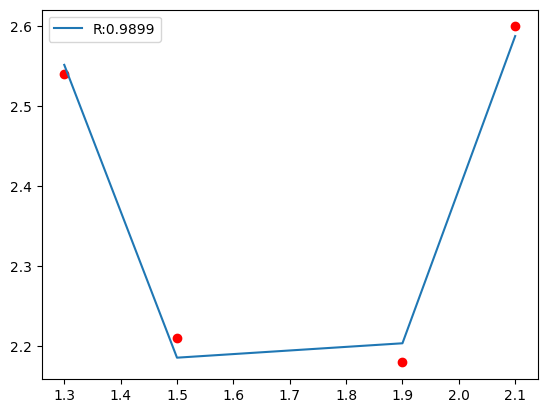

In [82]:
import numpy as np
import matplotlib.pyplot as plt
dataX = np.array([1.3,1.5,1.9,2.1])
dataY = np.array([2.54,2.21,2.18,2.6])

x = []
n = int(input("Masukkan jumlah orde: "))
xSeparation = []
print(f"Menentukan Persaaman Regresi Menggunakan Metode LSR Derajat {n}, LU-Decomposition dan Matriks Vandermonde Berdasarkan Data x,y")
for i in range(len(dataX)):
    pangkat = 0 
    for j in range(n+1):
        elementX = dataX[i]**pangkat
        pangkat += 1 
        xSeparation.append(elementX)
    x.append(xSeparation)
    xSeparation = [] # memisahkan setiap baris
print(f"Matriks X (Vandermonde): \n{x}")

def transposeMatrix(x):
    xT = []
    for j in range(len(x[0])):
        cols = []
        for i in range(len(x)):
            cols.append(x[i][j])
        xT.append(cols)
    return xT

xTranspose = transposeMatrix(x)
print(f"Matriks Transpose dari X : \n{xTranspose}")

m = []
def multiplyMatrixs(x1,x2):
    for i in range(len(x1)):
        row = []
        for j in range(len(x2[0])):
            sum = 0 
            for k in range(len(x1[0])):
                sum += x1[i][k] * x2[k][j]
            row.append(sum)
        m.append(row)    
    return m
multiplyM = multiplyMatrixs(xTranspose,x)
print(f"Matriks M : \n{multiplyM}")

#m = np.array([[10, 55, 385], [55, 385, 3025], [385, 3025, 25333]],float)
y = np.array([
    [1,0,0],
            [0,1,0],
            [0,0,1]],float)
y1 = np.array([
    [1,0,],
    [0,1,]],float)
beta = np.zeros_like(m)
U = np.zeros_like(m)
L = np.zeros_like(m)
def LUCrout():
    # Start
    for i in range(len(L)):
        L[i][0]= m[i][0] #2
        for j in range(0,len(m)):
            if i==j: #3
                U[i][j] = 1.0
            else:
                U[0][j] = m[0][j]/L[0][0] #4
    
    for j in range(1,len(L)): #5
        for i in range(j,len(m)):
            LUforLower = 0.0
            for k in range(0,j):
                LUforLower += L[i][k]*U[k][j]
            L[i][j] = m[i][j] - LUforLower
            
        for k in range(j,len(m)):
            LUforUpper = 0.0
            for i in range(0,j):
                LUforUpper += L[j][i]*U[i][k]
            U[j][k] = (m[j][k] - LUforUpper)/L[j][j]
    for q in range(len(m)):
        sumofLU = 0.0
        for k in range(0,q): # batas n-1 awalnya kemudian upper tidak sempurna perhitungannya
            sumofLU += L[q][k]*U[k][q]
        L[q][q] = m[q][q] - sumofLU
        
    for i in range(0,len(beta)):
        sumOFLD = 0.0
        for j in range(0,i):
            sumOFLD += L[i][j]*beta[j]
        if n == 2:
            beta[i] = (y[i] - sumOFLD)/L[i][i]
        elif n == 1:
            beta[i] = (y1[i] - sumOFLD)/L[i][i]
    print(f"Matriks Lower = \n{L}")
    print(f"Matriks Upper = \n{U}")
    print(f"Matriks D = \n{beta}")
LUCrout()

b = U
a = beta

inversM = np.array([[0,0,0],
                    [0,0,0],
                    [0,0,0]],float)

inversM1 = np.array([[0,0],
                    [0,0]],float)
if n == 1:
    panjangM = len(inversM1)
elif n == 2:
    panjangM = len(inversM)
def backwardSubs(u,d):
    for i in range(panjangM-1,-1,-1):
        sumUpper = 0.0
        for j in range(i+1,panjangM):
            if n == 2:
                sumUpper += u[i][j]*inversM[j]
            elif n == 1:
                sumUpper += u[i][j]*inversM1[j]
        if n == 2:
            inversM[i] = (d[i] - sumUpper)/u[i][i]
        elif n == 1:
            inversM1[i] = (d[i] - sumUpper)/u[i][i]
    if n == 2:
        print(f"Matriks Invers M : \n{inversM}")
    elif n == 1:
        print(f"Matriks Invers M : \n{inversM1}")
backwardSubs(b,a)

if n == 1:
    beta = inversM1@xTranspose@dataY
    print(f"Nilai koefisien beta= \n{beta}")
    print(f"Persamaan Regresi= \n {beta[0]} + {beta[1]}x")
elif n == 2:
    beta = inversM@xTranspose@dataY
    print(f"Nilai koefisien beta= \n{beta}")
    print(f"Persamaan Regresi= \n {beta[0]} + {beta[1]}x + ({beta[2]}x^2) ")

yBar = 2.3825
yHat = []
rValue = 0.0
def rSquared(dataY,yBar,yHat):
    if n == 2:
        yHat = [beta[0]+beta[1]*x+beta[2]*x**2 for x in dataX]
    elif n==1:
        yHat = [beta[0]+beta[1]*x for x in dataX]
    SSR = 0
    SST = 0
    for i in range(len(dataY)):
        SSR += (dataY[i] - yHat[i])**2
        SST += (dataY[i]-yBar)**2
    rValue = 1 - (SSR/SST)
    return rValue
rSquared(dataY,yBar,yHat)

if n == 1:
    dataYapprox = [beta[0]+beta[1]*x for x in dataX]
elif n == 2:
    dataYapprox = [beta[0]+beta[1]*x+beta[2]*x**2 for x in dataX]
    
plt.plot(dataX,dataYapprox,label="R:%.4f" %rSquared(dataY,yBar,yHat))
plt.scatter(dataX,dataY,color="red")
plt.legend()
plt.show()

Derajat 3

Menentukan Persaaman Regresi Menggunakan Metode LSR Derajat 3, LU-Decomposition dan Matriks Vandermonde Berdasarkan Data x,y
Matriks X (Vandermonde): 
[[1.0, 1.3, 1.6900000000000002, 2.197], [1.0, 1.5, 2.25, 3.375], [1.0, 1.9, 3.61, 6.858999999999999], [1.0, 2.1, 4.41, 9.261000000000001]]
Matriks Transpose dari X : 
[[1.0, 1.0, 1.0, 1.0], [1.3, 1.5, 1.9, 2.1], [1.6900000000000002, 2.25, 3.61, 4.41], [2.197, 3.375, 6.858999999999999, 9.261000000000001]]
Matriks M : 
[[4.0, 6.799999999999999, 11.96, 21.692], [6.799999999999999, 11.96, 21.692, 40.3988], [11.96, 21.692, 40.3988, 76.90868], [21.692, 40.3988, 76.90868, 149.029436]]
Matriks Lower = 
[[4.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00]
 [6.8000e+00 4.0000e-01 0.0000e+00 0.0000e+00]
 [1.1960e+01 1.3600e+00 1.4400e-02 0.0000e+00]
 [2.1692e+01 3.5224e+00 7.3440e-02 9.2160e-04]]
Matriks Upper = 
[[1.    1.7   2.99  5.423]
 [0.    1.    3.4   8.806]
 [0.    0.    1.    5.1  ]
 [0.    0.    0.    1.   ]]
Matriks D = 
[[ 2.50000000e-01  0.

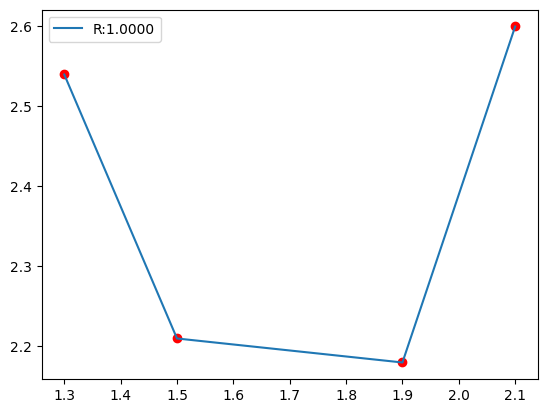

In [13]:
import numpy as np
import matplotlib.pyplot as plt
dataX = np.array([1.3,1.5,1.9,2.1])
dataY = np.array([2.54,2.21,2.18,2.6])

x = []
n = int(input("Masukkan jumlah orde: "))
xSeparation = []
print(f"Menentukan Persaaman Regresi Menggunakan Metode LSR Derajat {n}, LU-Decomposition dan Matriks Vandermonde Berdasarkan Data x,y")
for i in range(len(dataX)):
    pangkat = 0 
    for j in range(n+1):
        elementX = dataX[i]**pangkat
        pangkat += 1 
        xSeparation.append(elementX)
    x.append(xSeparation)
    xSeparation = [] # memisahkan setiap baris
print(f"Matriks X (Vandermonde): \n{x}")

def transposeMatrix(x):
    xT = []
    for j in range(len(x[0])):
        cols = []
        for i in range(len(x)):
            cols.append(x[i][j])
        xT.append(cols)
    return xT

xTranspose = transposeMatrix(x)
print(f"Matriks Transpose dari X : \n{xTranspose}")

m = []
def multiplyMatrixs(x1,x2):
    for i in range(len(x1)):
        row = []
        for j in range(len(x2[0])):
            sum = 0 
            for k in range(len(x1[0])):
                sum += x1[i][k] * x2[k][j]
            row.append(sum)
        m.append(row)    
    return m
multiplyM = multiplyMatrixs(xTranspose,x)
print(f"Matriks M : \n{multiplyM}")

#m = np.array([[10, 55, 385], [55, 385, 3025], [385, 3025, 25333]],float)
y = np.array([
    [1,0,0],
            [0,1,0],
            [0,0,1]],float)
y1 = np.array([
    [1,0,],
    [0,1,]],float)
y3 = np.array([
            [1,0,0,0],
            [0,1,0,0],
            [0,0,1,0],
            [0,0,0,1]],float)
beta = np.zeros_like(m)
U = np.zeros_like(m)
L = np.zeros_like(m)
def LUCrout():
    # Start
    for i in range(len(L)):
        L[i][0]= m[i][0] #2
        for j in range(0,len(m)):
            if i==j: #3
                U[i][j] = 1.0
            else:
                U[0][j] = m[0][j]/L[0][0] #4
    
    for j in range(1,len(L)): #5
        for i in range(j,len(m)):
            LUforLower = 0.0
            for k in range(0,j):
                LUforLower += L[i][k]*U[k][j]
            L[i][j] = m[i][j] - LUforLower
            
        for k in range(j,len(m)):
            LUforUpper = 0.0
            for i in range(0,j):
                LUforUpper += L[j][i]*U[i][k]
            U[j][k] = (m[j][k] - LUforUpper)/L[j][j]
    for q in range(len(m)):
        sumofLU = 0.0
        for k in range(0,q): # batas n-1 awalnya kemudian upper tidak sempurna perhitungannya
            sumofLU += L[q][k]*U[k][q]
        L[q][q] = m[q][q] - sumofLU
        
    for i in range(0,len(beta)):
        sumOFLD = 0.0
        for j in range(0,i):
            sumOFLD += L[i][j]*beta[j]
        if n == 2:
            beta[i] = (y[i] - sumOFLD)/L[i][i]
        elif n == 1:
            beta[i] = (y1[i] - sumOFLD)/L[i][i]
        elif n ==3:
            beta[i] = (y3[i] - sumOFLD)/L[i][i]
            
    print(f"Matriks Lower = \n{L}")
    print(f"Matriks Upper = \n{U}")
    print(f"Matriks D = \n{beta}")
LUCrout()

b = U
a = beta
inversM = np.array([[0,0,0],
                    [0,0,0],
                    [0,0,0]],float)

inversM1 = np.array([[0,0],
                    [0,0]],float)
inversM3 = np.zeros_like(y3)
if n == 1:
    panjangM = len(inversM1)
elif n == 2:
    panjangM = len(inversM)
elif n == 3:
    panjangM = len(inversM3)
def backwardSubs(u,d):
    for i in range(panjangM-1,-1,-1):
        sumUpper = 0.0
        for j in range(i+1,panjangM):
            if n == 2:
                sumUpper += u[i][j]*inversM[j]
            elif n == 1:
                sumUpper += u[i][j]*inversM1[j]
            elif n == 3:
                sumUpper += u[i][j]*inversM3[j]
        if n == 2:
            inversM[i] = (d[i] - sumUpper)/u[i][i]
        elif n == 1:
            inversM1[i] = (d[i] - sumUpper)/u[i][i]
        elif n ==3:
            inversM3[i] = (d[i] - sumUpper)/u[i][i]
    if n == 2:
        print(f"Matriks Invers M : \n{inversM}")
    elif n == 1:
        print(f"Matriks Invers M : \n{inversM1}")
    elif n == 3:
        print(f"Matriks Invers M : \n{inversM3}")
backwardSubs(b,a)

if n == 1:
    beta = inversM1@xTranspose@dataY
    print(f"Nilai koefisien beta= \n{beta}")
    print(f"Persamaan Regresi= \n {beta[0]} + {beta[1]}x")
elif n == 2:
    beta = inversM@xTranspose@dataY
    print(f"Nilai koefisien beta= \n{beta}")
    print(f"Persamaan Regresi= \n {beta[0]} + {beta[1]}x + ({beta[2]}x^2) ")
elif n == 3:
    beta = inversM3@xTranspose@dataY
    print(f"Nilai koefisien beta= \n{beta}")
    print(f"Persamaan Regresi= \n {beta[0]} + {beta[1]}x + ({beta[2]}x^2) + {beta[3]}x^3 ")

yBar = 2.3825
yHat = []
rValue = 0.0
def rSquared(dataY,yBar,yHat):
    if n == 2:
        yHat = [beta[0]+beta[1]*x+beta[2]*x**2 for x in dataX]
    elif n==1:
        yHat = [beta[0]+beta[1]*x for x in dataX]
    elif n ==3:
        yHat = [beta[0]+beta[1]*x+beta[2]*x**2+beta[3]*x**3 for x in dataX]
        
    SSR = 0
    SST = 0
    for i in range(len(dataY)):
        SSR += (dataY[i] - yHat[i])**2
        SST += (dataY[i]-yBar)**2
    rValue = 1 - (SSR/SST)
    print(f"Nilai Koefisien Relasi {rValue}")
    return rValue
rSquared(dataY,yBar,yHat)

if n == 1:
    dataYapprox = [beta[0]+beta[1]*x for x in dataX]
elif n == 2:
    dataYapprox = [beta[0]+beta[1]*x+beta[2]*x**2 for x in dataX]
elif n == 3:
    dataYapprox = [beta[0]+beta[1]*x+beta[2]*x**2+beta[3]*x**3 for x in dataX]
        
plt.plot(dataX,dataYapprox,label="R:%.4f" %rSquared(dataY,yBar,yHat))
plt.scatter(dataX,dataY,color="red")
plt.legend()
plt.show()

Tugas Akhir

Menentukan Persaaman Regresi Menggunakan Metode LSR Derajat 2, LU-Decomposition dan Matriks Vandermonde Berdasarkan Data x,y
Matriks X (Vandermonde): 
[[1.0, 73.0, 5329.0], [1.0, 50.0, 2500.0], [1.0, 128.0, 16384.0], [1.0, 170.0, 28900.0], [1.0, 87.0, 7569.0], [1.0, 108.0, 11664.0], [1.0, 135.0, 18225.0], [1.0, 69.0, 4761.0], [1.0, 148.0, 21904.0], [1.0, 132.0, 17424.0]]
Matriks Transpose dari X : 
[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [73.0, 50.0, 128.0, 170.0, 87.0, 108.0, 135.0, 69.0, 148.0, 132.0], [5329.0, 2500.0, 16384.0, 28900.0, 7569.0, 11664.0, 18225.0, 4761.0, 21904.0, 17424.0]]
Matriks M : 
[[10.0, 1100.0, 134660.0], [1100.0, 134660.0, 17773028.0], [134660.0, 17773028.0, 2469831092.0]]
Matriks Lower = 
[[1.00000000e+01 0.00000000e+00 0.00000000e+00]
 [1.10000000e+03 1.36600000e+04 0.00000000e+00]
 [1.34660000e+05 2.96042800e+06 1.49084673e+07]]
Matriks Upper = 
[[1.00000000e+00 1.10000000e+02 1.34660000e+04]
 [0.00000000e+00 1.00000000e+00 2.16722401e+02]
 [0.

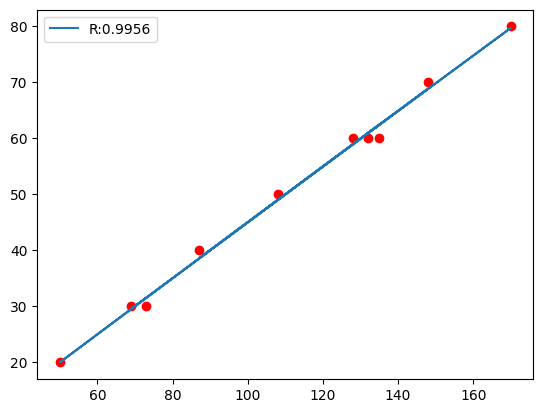

In [16]:
import numpy as np
import matplotlib.pyplot as plt
dataX = np.array([73,50,128,170,87,108,135,69,148,132],float)
dataY = np.array([30,20,60,80,40,50,60,30,70,60],float)

x = []
n = int(input("Masukkan jumlah orde: "))
xSeparation = []
print(f"Menentukan Persaaman Regresi Menggunakan Metode LSR Derajat {n}, LU-Decomposition dan Matriks Vandermonde Berdasarkan Data x,y")
for i in range(len(dataX)):
    pangkat = 0 
    for j in range(n+1):
        elementX = dataX[i]**pangkat
        pangkat += 1 
        xSeparation.append(elementX)
    x.append(xSeparation)
    xSeparation = [] # memisahkan setiap baris
print(f"Matriks X (Vandermonde): \n{x}")

def transposeMatrix(x):
    xT = []
    for j in range(len(x[0])):
        cols = []
        for i in range(len(x)):
            cols.append(x[i][j])
        xT.append(cols)
    return xT

xTranspose = transposeMatrix(x)
print(f"Matriks Transpose dari X : \n{xTranspose}")

m = []
def multiplyMatrixs(x1,x2):
    for i in range(len(x1)):
        row = []
        for j in range(len(x2[0])):
            sum = 0 
            for k in range(len(x1[0])):
                sum += x1[i][k] * x2[k][j]
            row.append(sum)
        m.append(row)    
    return m
multiplyM = multiplyMatrixs(xTranspose,x)
print(f"Matriks M : \n{multiplyM}")


y = np.array([
    [1,0,0],
            [0,1,0],
            [0,0,1]],float)
y1 = np.array([
    [1,0,],
    [0,1,]],float)
y3 = np.array([
            [1,0,0,0],
            [0,1,0,0],
            [0,0,1,0],
            [0,0,0,1]],float)
beta = np.zeros_like(m)
U = np.zeros_like(m)
L = np.zeros_like(m)
def LUCrout():
    # Start
    for i in range(len(L)):
        L[i][0]= m[i][0] #2
        for j in range(0,len(m)):
            if i==j: #3
                U[i][j] = 1.0
            else:
                U[0][j] = m[0][j]/L[0][0] #4
    
    for j in range(1,len(L)): #5
        for i in range(j,len(m)):
            LUforLower = 0.0
            for k in range(0,j):
                LUforLower += L[i][k]*U[k][j]
            L[i][j] = m[i][j] - LUforLower
            
        for k in range(j,len(m)):
            LUforUpper = 0.0
            for i in range(0,j):
                LUforUpper += L[j][i]*U[i][k]
            U[j][k] = (m[j][k] - LUforUpper)/L[j][j]
    for q in range(len(m)):
        sumofLU = 0.0
        for k in range(0,q): # batas n-1 awalnya kemudian upper tidak sempurna perhitungannya
            sumofLU += L[q][k]*U[k][q]
        L[q][q] = m[q][q] - sumofLU
        
    for i in range(0,len(beta)):
        sumOFLD = 0.0
        for j in range(0,i):
            sumOFLD += L[i][j]*beta[j]
        if n == 2:
            beta[i] = (y[i] - sumOFLD)/L[i][i]
        elif n == 1:
            beta[i] = (y1[i] - sumOFLD)/L[i][i]
        elif n ==3:
            beta[i] = (y3[i] - sumOFLD)/L[i][i]
            
    print(f"Matriks Lower = \n{L}")
    print(f"Matriks Upper = \n{U}")
    print(f"Matriks D = \n{beta}")
LUCrout()

b = U
a = beta

inversM = np.array([[0,0,0],
                    [0,0,0],
                    [0,0,0]],float)

inversM1 = np.array([[0,0],
                    [0,0]],float)
inversM3 = np.zeros_like(y3)
if n == 1:
    panjangM = len(inversM1)
elif n == 2:
    panjangM = len(inversM)
elif n == 3:
    panjangM = len(inversM3)
def backwardSubs(u,d):
    for i in range(panjangM-1,-1,-1):
        sumUpper = 0.0
        for j in range(i+1,panjangM):
            if n == 2:
                sumUpper += u[i][j]*inversM[j]
            elif n == 1:
                sumUpper += u[i][j]*inversM1[j]
            elif n == 3:
                sumUpper += u[i][j]*inversM3[j]
        if n == 2:
            inversM[i] = (d[i] - sumUpper)/u[i][i]
        elif n == 1:
            inversM1[i] = (d[i] - sumUpper)/u[i][i]
        elif n ==3:
            inversM3[i] = (d[i] - sumUpper)/u[i][i]
    if n == 2:
        print(f"Matriks Invers M : \n{inversM}")
    elif n == 1:
        print(f"Matriks Invers M : \n{inversM1}")
    elif n == 3:
        print(f"Matriks Invers M : \n{inversM3}")
backwardSubs(b,a)

if n == 1:
    beta = inversM1@xTranspose@dataY
    print(f"Nilai koefisien beta= \n{beta}")
    print(f"Persamaan Regresi= \n {beta[0]} + {beta[1]}x")
elif n == 2:
    beta = inversM@xTranspose@dataY
    print(f"Nilai koefisien beta= \n{beta}")
    print(f"Persamaan Regresi= \n {beta[0]} + {beta[1]}x + ({beta[2]}x^2) ")
elif n == 3:
    beta = inversM3@xTranspose@dataY
    print(f"Nilai koefisien beta= \n{beta}")
    print(f"Persamaan Regresi= \n {beta[0]} + {beta[1]}x + ({beta[2]}x^2) + {beta[3]}x^3 ")

yBar = 50.0
yHat = []
rValue = 0.0
def rSquared(dataY,yBar,yHat):
    if n == 2:
        yHat = [beta[0]+beta[1]*x+beta[2]*x**2 for x in dataX]
    elif n==1:
        yHat = [beta[0]+beta[1]*x for x in dataX]
    elif n ==3:
        yHat = [beta[0]+beta[1]*x+beta[2]*x**2+beta[3]*x**3 for x in dataX]
        
    SSR = 0
    SST = 0
    for i in range(len(dataY)):
        SSR += (dataY[i] - yHat[i])**2
        SST += (dataY[i]-yBar)**2
    rValue = 1 - (SSR/SST)
    print(f"Nilai Koefisien Relasi {rValue}")
    return rValue
rSquared(dataY,yBar,yHat)

if n == 1:
    dataYapprox = [beta[0]+beta[1]*x for x in dataX]
elif n == 2:
    dataYapprox = [beta[0]+beta[1]*x+beta[2]*x**2 for x in dataX]
elif n == 3:
    dataYapprox = [beta[0]+beta[1]*x+beta[2]*x**2+beta[3]*x**3 for x in dataX]
        
plt.plot(dataX,dataYapprox,label="R:%.4f" %rSquared(dataY,yBar,yHat))
plt.scatter(dataX,dataY,color="red")
plt.legend()
plt.show()